<a href="https://colab.research.google.com/github/jiseokkang/jiseok/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A512%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이진 분류 예제

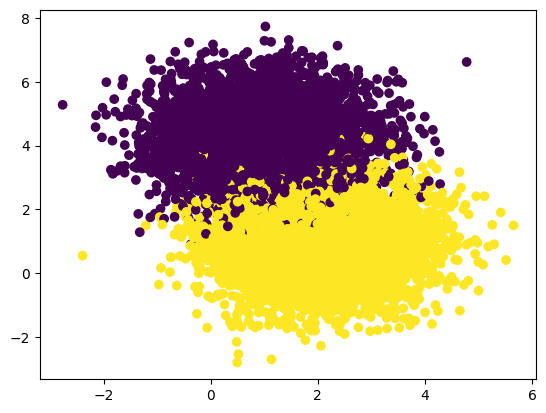

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

data, labels = make_blobs(n_samples=10000, n_features=2, centers=2, random_state=0)
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

데이터 분할

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)
X_val = X_train[:1000]
X_train = X_train[1000:]
y_val = y_train[:1000]
y_train = y_train[1000:]

신경망 구조 생성

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense (1, input_dim=2, activation='sigmoid'))

신경망 구조 요약

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(optimizer='SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 100, validation_data = (X_val, y_val))

Epoch 1/100
70/70 [==============================] - 2s 5ms/step - loss: 1.0734 - accuracy: 0.5543 - val_loss: 0.5665 - val_accuracy: 0.8760
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 0.4722 - accuracy: 0.8691 - val_loss: 0.4214 - val_accuracy: 0.8710
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 0.3792 - accuracy: 0.8897 - val_loss: 0.3610 - val_accuracy: 0.8950
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 0.3309 - accuracy: 0.9033 - val_loss: 0.3247 - val_accuracy: 0.9050
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 0.3001 - accuracy: 0.9124 - val_loss: 0.3001 - val_accuracy: 0.9090
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.9176 - val_loss: 0.2824 - val_accuracy: 0.9100
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.9193 - val_loss: 0.2690 - val_accuracy: 0.9110
Epoch 8/100
7

In [7]:
result = model.evaluate(X_test, y_test)
result

63/63 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9600


[0.11833483725786209, 0.9599999785423279]

손실 그래프 분석을 통한 과대적합/과소적합/학습잘됨 여부 판단

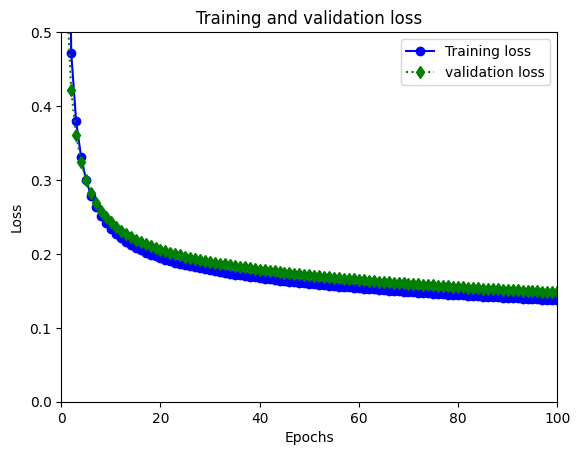

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'gd:', label='validation loss')
plt.title('Training and validation loss')
plt.axis([0, 100, 0.0, 0.5]) # xmin, xmax, ymin, ymax
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

정확도 그래프

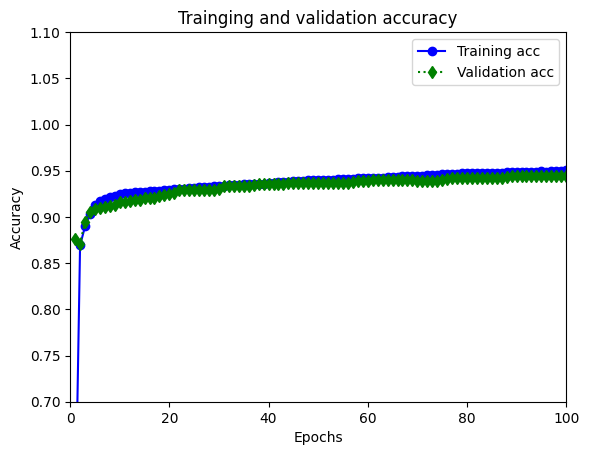

In [9]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'gd:', label='Validation acc')
plt.title('Trainging and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, 100, 0.7, 1.1])
plt.legend()
plt.show()

다중분류 예제 (아이리스 품종 분류)

In [10]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
import tensorflow as tf

y_train = tf.one_hot(y_train, 3)
y_test = tf.one_hot(y_test, 3)

얕은 신경망

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(2, input_shape=(4, )))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


심층 신경망

In [13]:
model = models.Sequential()
model.add(layers.Dense(2, input_shape=(4,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 16)                48        
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 701 (2.74 KB)
Trainable params: 701 (2.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


모델 컴파일

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

유효성 데이터 만들기

In [15]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 400)

Epoch 1/400
3/3 [==============================] - 2s 131ms/step - loss: 1.1971 - accuracy: 0.3333 - val_loss: 1.1552 - val_accuracy: 0.2500
Epoch 2/400
3/3 [==============================] - 0s 33ms/step - loss: 1.0710 - accuracy: 0.3646 - val_loss: 1.0810 - val_accuracy: 0.2500
Epoch 3/400
3/3 [==============================] - 0s 29ms/step - loss: 1.0018 - accuracy: 0.3438 - val_loss: 1.0314 - val_accuracy: 0.2917
Epoch 4/400
3/3 [==============================] - 0s 29ms/step - loss: 0.9602 - accuracy: 0.3646 - val_loss: 0.9935 - val_accuracy: 0.3333
Epoch 5/400
3/3 [==============================] - 0s 29ms/step - loss: 0.9214 - accuracy: 0.4062 - val_loss: 0.9587 - val_accuracy: 0.4167
Epoch 6/400
3/3 [==============================] - 0s 23ms/step - loss: 0.8927 - accuracy: 0.4375 - val_loss: 0.9267 - val_accuracy: 0.5000
Epoch 7/400
3/3 [==============================] - 0s 22ms/step - loss: 0.8700 - accuracy: 0.4896 - val_loss: 0.9015 - val_accuracy: 0.5000
Epoch 8/400
3/3 [==

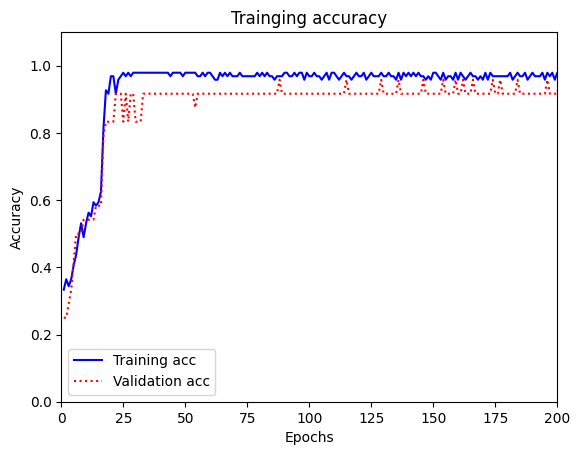

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
plt.clf()
acc = history_dict['accuracy']
epoch_range= range(1, len(acc)+1)
plt.plot(epoch_range, acc, 'b', label='Training acc')
plt.plot(epoch_range, history_dict['val_accuracy'], 'r:', label='Validation acc')
plt.axis([0, 200, 0.0, 1.1])
plt.title('Trainging accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

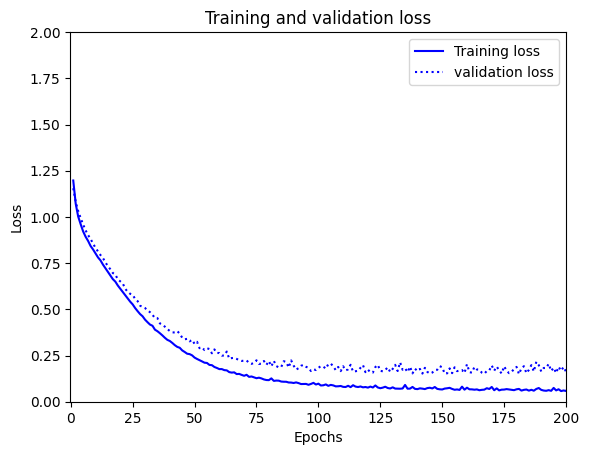

In [17]:
plt.plot(epoch_range, history_dict['loss'], 'b', label='Training loss')
plt.plot(epoch_range, history_dict['val_loss'], 'b:',
label='validation loss')
plt.title('Training and validation loss')
plt.axis([-0.3, 200, 0, 2.0])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

평가 결과

In [18]:
result = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 27ms/step - loss: 0.0222 - accuracy: 1.0000


학습의 조기 종료

In [19]:
from keras import models
from keras import layers

model = models.Sequential()

In [20]:
model.add(layers.Dense(2, input_shape=(4, )))
model.add(layers.Dense(3, activation='softmax'))

In [21]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

EarlyStopping 함수 설정

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=2)

In [23]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
3/3 [==============================] - 1s 82ms/step - loss: 7.2085 - accuracy: 0.0000e+00 - val_loss: 6.3195 - val_accuracy: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 0s 14ms/step - loss: 7.0340 - accuracy: 0.0000e+00 - val_loss: 6.2079 - val_accuracy: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 0s 14ms/step - loss: 6.9117 - accuracy: 0.0000e+00 - val_loss: 6.1146 - val_accuracy: 0.0000e+00
Epoch 4/1000
3/3 [==============================] - 0s 14ms/step - loss: 6.8041 - accuracy: 0.0000e+00 - val_loss: 6.0281 - val_accuracy: 0.0000e+00
Epoch 5/1000
3/3 [==============================] - 0s 14ms/step - loss: 6.7049 - accuracy: 0.0000e+00 - val_loss: 5.9463 - val_accuracy: 0.0000e+00
Epoch 6/1000
3/3 [==============================] - 0s 15ms/step - loss: 6.6112 - accuracy: 0.0000e+00 - val_loss: 5.8686 - val_accuracy: 0.0000e+00
Epoch 7/1000
3/3 [==============================] - 0s 15ms/step - loss: 6.5204 - accuracy: 0.0000e+00 - v

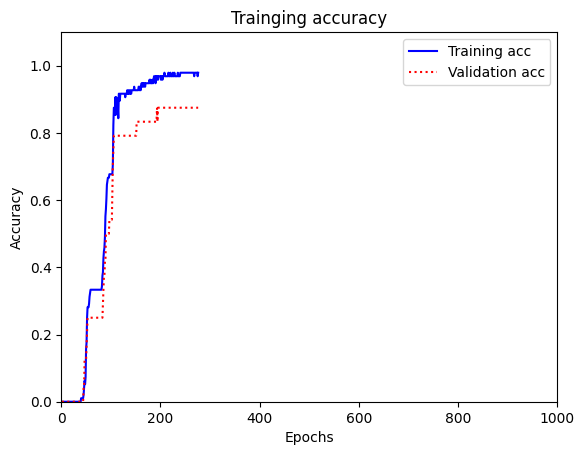

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
plt.clf()
acc = history_dict['accuracy']
epoch_range= range(1, len(acc)+1)
plt.plot(epoch_range, acc, 'b', label='Training acc')
plt.plot(epoch_range, history_dict['val_accuracy'], 'r:', label='Validation acc')
plt.axis([0, 1000, 0.0, 1.1])
plt.title('Trainging accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

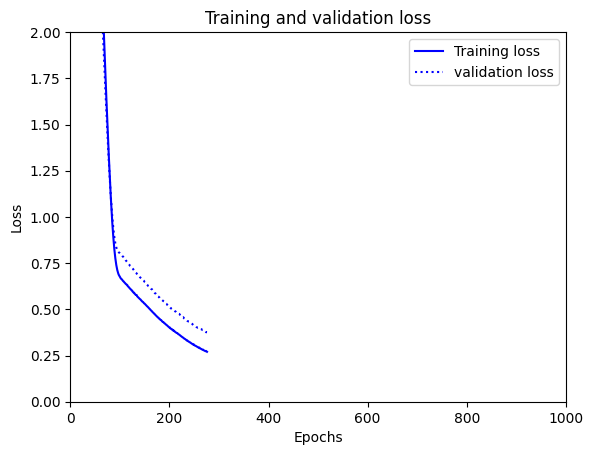

In [25]:
plt.plot(epoch_range, history_dict['loss'], 'b', label='Training loss')
plt.plot(epoch_range, history_dict['val_loss'], 'b:',
label='validation loss')
plt.title('Training and validation loss')
plt.axis([-0.3, 1000, 0, 2.0])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
resutl = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 61ms/step - loss: 0.2392 - accuracy: 1.0000


Dropout 기능

In [27]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

y_train = tf.one_hot(y_train, 3)
y_test = tf.one_hot(y_test, 3)

In [28]:
from keras import models
from keras.layers import Dense, Dropout

model = models.Sequential()
model.add(Dense (2, input_shape=(4, )))
model.add(Dense(16, activation='relu'))
model.add(Dense (32, activation='relu'))
model.add(Dense (3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 80
history = model.fit(X_train, y_train, validation_split=0.4, epochs=epochs)

Epoch 1/80
2/2 [==============================] - 1s 215ms/step - loss: 1.2198 - accuracy: 0.4222 - val_loss: 1.2590 - val_accuracy: 0.2333
Epoch 2/80
2/2 [==============================] - 0s 30ms/step - loss: 1.1253 - accuracy: 0.4222 - val_loss: 1.2346 - val_accuracy: 0.2333
Epoch 3/80
2/2 [==============================] - 0s 29ms/step - loss: 1.0850 - accuracy: 0.4222 - val_loss: 1.1800 - val_accuracy: 0.2333
Epoch 4/80
2/2 [==============================] - 0s 51ms/step - loss: 1.0496 - accuracy: 0.4222 - val_loss: 1.1612 - val_accuracy: 0.2333
Epoch 5/80
2/2 [==============================] - 0s 31ms/step - loss: 1.0251 - accuracy: 0.4222 - val_loss: 1.1420 - val_accuracy: 0.2333
Epoch 6/80
2/2 [==============================] - 0s 30ms/step - loss: 1.0075 - accuracy: 0.4222 - val_loss: 1.1352 - val_accuracy: 0.2333
Epoch 7/80
2/2 [==============================] - 0s 30ms/step - loss: 0.9954 - accuracy: 0.4222 - val_loss: 1.1314 - val_accuracy: 0.2333
Epoch 8/80
2/2 [==========

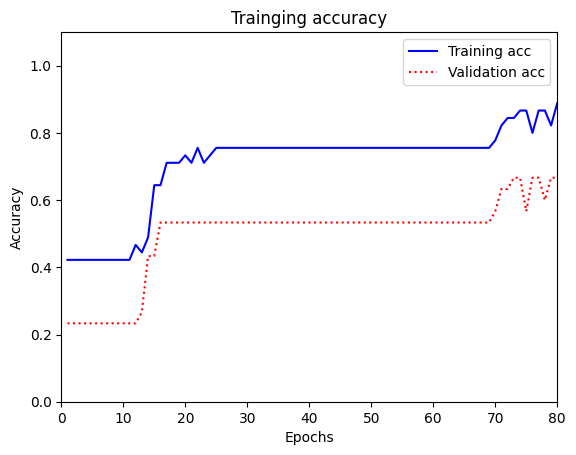

In [29]:
import matplotlib.pyplot as plt
history_dict = history.history
plt.clf()
acc = history_dict['accuracy']
epoch_range = range(1, len(acc)+1)
plt.plot(epoch_range, acc, 'b', label='Training acc')
plt.plot(epoch_range, history_dict['val_accuracy'], 'r:', label='Validation acc')
plt.axis([0, epochs, 0.0, 1.1])
plt.title('Trainging accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

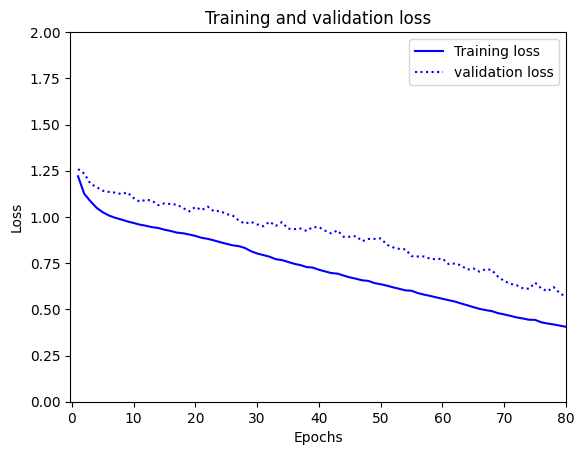

In [30]:
plt.plot(epoch_range, history_dict['loss'], 'b', label='Training loss')
plt.plot(epoch_range, history_dict['val_loss'], 'b:',
label='validation loss')
plt.title('Training and validation loss')
plt.axis([-0.3, epochs, 0, 2.0])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
from keras import models
from keras.layers import Dense, Dropout

model = models.Sequential()
model.add(Dense(2, input_shape=(4, )))
#model.add(Dropout (0.05))
model.add(Dense(16, activation='relu'))
#model.add(Dropout (0.05))
model.add(Dense(32, activation='relu'))
#model.add(Dropout (0.05))
model.add(Dense (3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 80
history = model.fit(X_train, y_train, validation_split=0.4, epochs=epochs)

Epoch 1/80
2/2 [==============================] - 1s 190ms/step - loss: 1.0408 - accuracy: 0.4444 - val_loss: 1.1053 - val_accuracy: 0.2333
Epoch 2/80
2/2 [==============================] - 0s 29ms/step - loss: 0.9882 - accuracy: 0.4222 - val_loss: 1.0984 - val_accuracy: 0.2333
Epoch 3/80
2/2 [==============================] - 0s 33ms/step - loss: 0.9753 - accuracy: 0.4222 - val_loss: 1.0819 - val_accuracy: 0.2333
Epoch 4/80
2/2 [==============================] - 0s 33ms/step - loss: 0.9689 - accuracy: 0.4222 - val_loss: 1.1137 - val_accuracy: 0.2333
Epoch 5/80
2/2 [==============================] - 0s 34ms/step - loss: 0.9589 - accuracy: 0.4222 - val_loss: 1.0971 - val_accuracy: 0.2333
Epoch 6/80
2/2 [==============================] - 0s 32ms/step - loss: 0.9522 - accuracy: 0.4222 - val_loss: 1.0990 - val_accuracy: 0.2333
Epoch 7/80
2/2 [==============================] - 0s 32ms/step - loss: 0.9456 - accuracy: 0.4222 - val_loss: 1.1076 - val_accuracy: 0.2333
Epoch 8/80
2/2 [==========

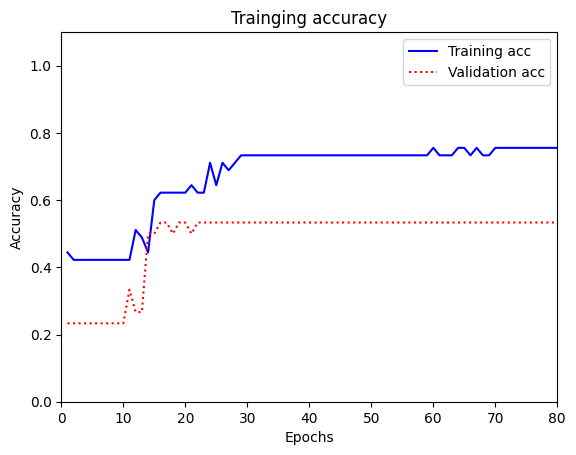

In [32]:
import matplotlib.pyplot as plt
history_dict = history.history
plt.clf()
acc = history_dict['accuracy']
epoch_range = range(1, len(acc)+1)
plt.plot(epoch_range, acc, 'b', label='Training acc')
plt.plot(epoch_range, history_dict['val_accuracy'], 'r:', label='Validation acc')
plt.axis([0, epochs, 0.0, 1.1])
plt.title('Trainging accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

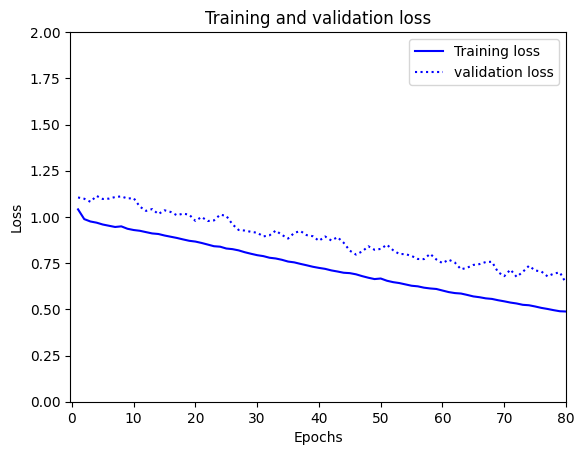

In [33]:
plt.plot(epoch_range, history_dict['loss'], 'b', label='Training loss')
plt.plot(epoch_range, history_dict['val_loss'], 'b:',
label='validation loss')
plt.title('Training and validation loss')
plt.axis([-0.3, epochs, 0, 2.0])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

이미지 처리 모델

MNIST Data 불러오기

In [34]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28 ,28, 1))
X_test = X_test.reshape((10000, 28 ,28, 1))

11490434/11490434 [==============================] - 1s 0us/step


모델구성

In [35]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # 피처를 자동으로 추출해주는 CNN => Feature Learning
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                  padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # 우리가 잘 써먹어온 완전 연결층
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)             

훈련(Fit) - 실행전 런타임을 GPU로 하는 것을 권장!

In [36]:
import time

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

hist = model.fit(X_train, y_train, epochs=5, verbose = 1, validation_data=(X_test, y_test))

print(f'Fit Time :{time.time() - start_time}')

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.1189 - accuracy: 0.9627 - val_loss: 0.0312 - val_accuracy: 0.9902
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.0287 - val_accuracy: 0.9903
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.0243 - val_accuracy: 0.9915
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0241 - accuracy: 0.9919 - val_loss: 0.0326 - val_accuracy: 0.9902
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0317 - val_accuracy: 0.9907
Fit Time :83.12415099143982


훈련결과 그래프로 보기

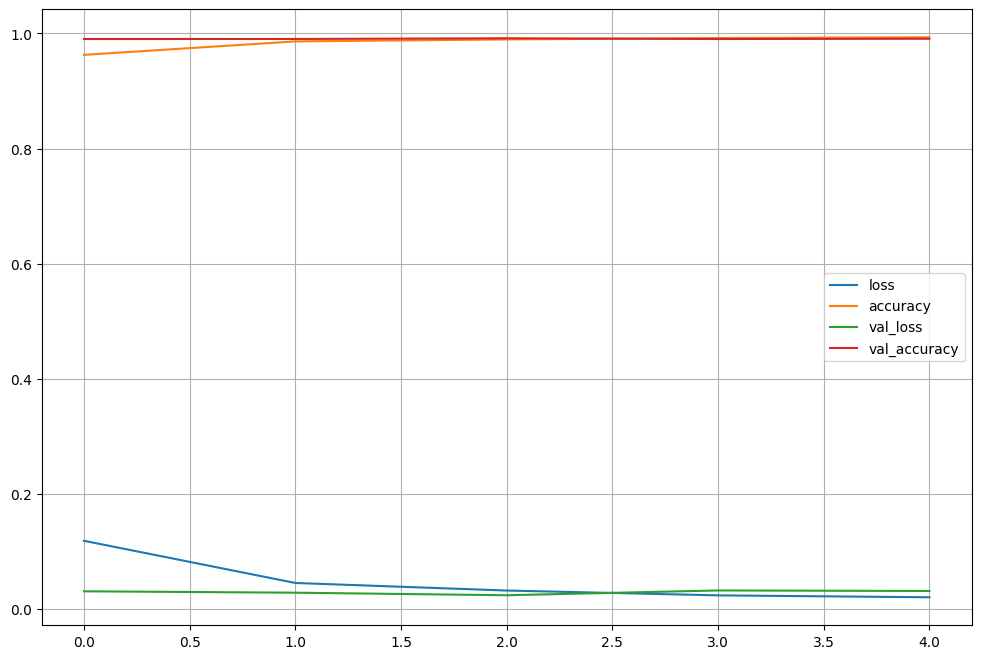

In [37]:
import matplotlib.pyplot as plt

plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

Test해보기

In [38]:
score = model.evaluate(X_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0317 - accuracy: 0.9907
Test Loss : 0.03168452903628349
Test Accuracy  : 0.9907000064849854


데이터 예측

In [39]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

오분류 데이터만 모아보기

In [40]:
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

93

틀린 데이터 16개를 그림으로 출력하여 확인 (얼마나 이상하게 썼을까?)

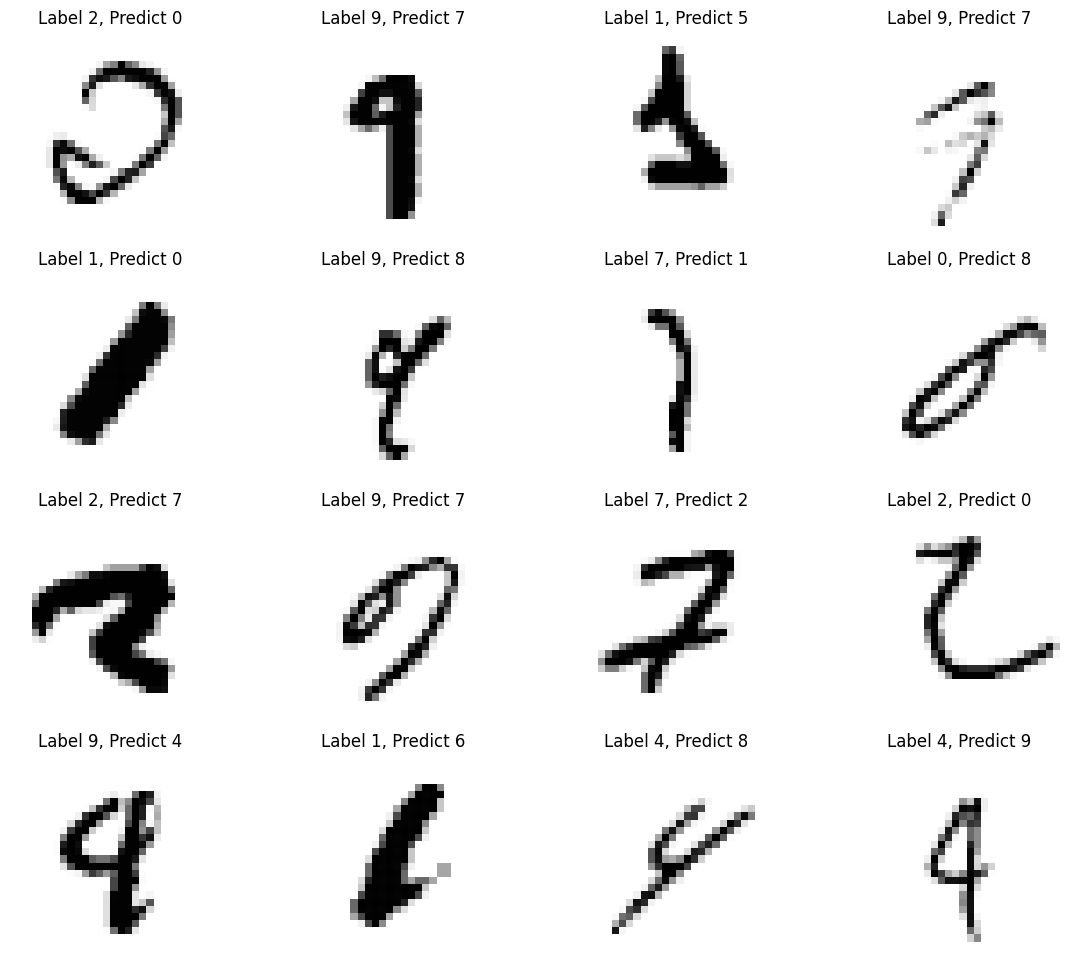

In [41]:
import random

samples = random.choices(population=wrong_result, k =16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

학습된 모델 저장

In [42]:
model.save('MNIST_CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




---


> 이전에 코딩해봤던 모델들과 비교


---



In [43]:
import numpy as np
from tensorflow.keras.datasets import mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
print(test_labels)

[7 2 1 ... 4 5 6]


Index 0: Label 2


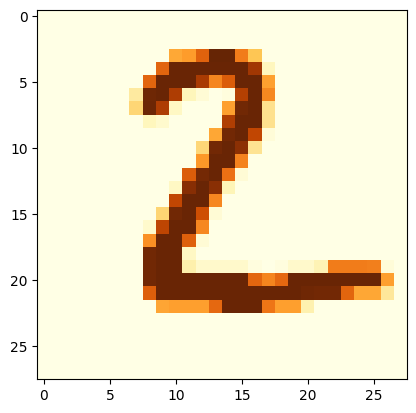

In [44]:
import matplotlib.pyplot as plt
max_examples = 10000
data = train_data[:max_examples]
labels = train_labels[:max_examples]
plt.imshow(test_data[1], cmap=plt.cm.YlOrBr)
print('Index %d: Label %d' % (0, test_labels[1]))

In [45]:
print(data[0].shape)

(28, 28)


In [46]:
print(test_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [47]:
import tensorflow as tf
from keras import models
from keras import *
from keras.layers import Dense

width = 28
height = 28
x_train = train_data.reshape(60000, width*height).astype('float32') / 255.0
x_test = test_data.reshape(10000, width*height).astype('float32') / 255.0

y_train = tf.one_hot(train_labels, 10)
# y_val = tf.one_hot(y_train, 10)
y_test = tf.one_hot(test_labels, 10)

model = models.Sequential()
model.add(layers.Dense(256, input_dim=width*height, activation = 'relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# <모델 설정>
model.compile(loss='categorical_crossentropy', optimizer='sgd',
#<모델 학습>
metrics=['acc'])
hist = model.fit(x_train, y_train, epochs=20, batch_size=32)
model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5997 - acc: 0.8446
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2842 - acc: 0.9183
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2329 - acc: 0.9330
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1992 - acc: 0.9423
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1743 - acc: 0.9496
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1540 - acc: 0.9556
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1383 - acc: 0.9601
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9648
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1144 - acc: 0.9675
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1047 - acc: 0.9706
Epoch 11/20
1875/1875 [======

[0.0800376683473587, 0.9751999974250793]

In [48]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
width = 28
height = 28
train_data = train_data[:5000,:,:]
test_data = test_data[:500, :, :]

train_labels = train_labels[:5000]
test_labels = test_labels[:500]

train_data = train_data.reshape(5000, width*height).astype('float32') / 255.0
test_data = test_data.reshape(500, width*height).astype('float32') / 255.0

결정트리

In [49]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

from sklearn.metrics import accuracy_score

print (accuracy_score (test_labels, predictions))

0.766


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

digits = datasets.load_digits()
clf = KNeighborsClassifier()
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

from sklearn.metrics import accuracy_score
print (accuracy_score (test_labels, predictions))

0.91


In [51]:
import random

class myKNN():
  def fit(self, train_data, train_labels):
    self.train_data = train_data
    self.train_labels = train_labels
  def predict(self, test_data):
    predictions = []
    for row in test_data:
      label = random.choice(self.train_labels)
      predictions.append(label)
    return predictions

clf = myKNN()
#나만의 구분자를 사용
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions))

0.1


In [52]:
from scipy.spatial import distance

def euc(a,b):
  # return abs(a-b)
  return distance.euclidean(a, b)

class eucKNN():
  def fit(self, train_data, train_labels):
    self.train_data = train_data
    self.train_labels = train_labels
  def predict(self, test_data):
    predictions = []
    for row in test_data:
      label = self.closest(row)
      predictions.append(label)
    return predictions
  def closest(self, row):
    best_dist = euc(row, self.train_data[0])
    best_index = 0
    for i in range(1, len(self.train_data)):
      dist = euc(row, self.train_data[i])
      if dist < best_dist:
        best_dist = dist
        best_index = i
    return self.train_labels[best_index]

clf = eucKNN()
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions))

0.906


토이 데이터 세트

In [53]:
from scipy.spatial import distance
def euc(a,b):
  return distance.euclidean(a, b)

class eucKNN():
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train
  def predict(self, x_test):
    predictions = []
    for row in x_test:
      label = self.closest(row)
      predictions.append(label)
    return predictions
  def closest(self, row):
    best_dist = euc(row, self.X_train[0])
    best_index = 0
    for i in range(1, len(self.X_train)):
      dist = euc(row, self.X_train[i])
      if dist< best_dist:
        best_dist = dist
        best_index = i
    return self.y_train[best_index]

clf = eucKNN()
clf.fit(digits.data[:-500], digits.target[:-500])
predictions = clf.predict(digits.data[-500:])

from sklearn.metrics import accuracy_score
print(accuracy_score(digits.target[-500:], predictions))

0.96


In [55]:
from sklearn import datasets
digits = datasets.load_digits()
print(len(digits.data), len(digits.target))

1797 1797


In [54]:
from sklearn import svm
clf = svm.SVC (gamma=0.001, C=100.)
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions))

0.926


비행기 탑승객 예측 모델 (시계열데이터분석)

In [56]:
import pandas as pd

dataset = pd.read_csv('/content/sample_data/airline-passengers.csv', engine='python')
dataset.head(3)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [57]:
dataset.pop('Month')
dataset.tail(3)

,Passengers
141,461
142,390
143,432


칼럼 이름 교체

In [58]:
dataset.columns = ['Passengers']
dataset.head(3)

,Passengers
0,112
1,118
2,132


NaN 있는 행 삭제

In [59]:
dataset = dataset.dropna()
dataset.tail(3)

,Passengers
141,461
142,390
143,432


정규화

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler()
dataset = scaled.fit_transform(dataset)
print(dataset[:3])

[[0.01544402]
 [0.02702703]
 [0.05405405]]


훈련 데이터와 테스트 데이터 배분

In [61]:
train = dataset[:120]
test = dataset[120:]
print(test.shape)

(24, 1)


입력데이터(feature)와 목표데이터(target 또는 label) 생성

In [62]:
def create_seq(data, lookback=1):
  X_data = []
  y_data = []
  for i in range(len(data)-lookback-1):
    add = data[i:(i+lookback), 0]
    X_data.append(add)
    y_data.append(data[i + lookback, 0])
  return np.array(X_data), np.array(y_data)


In [63]:
import numpy as np
lookback = 1
X_train, y_train = create_seq(train, lookback)
X_test, y_test = create_seq(test, lookback)
print(X_train[:6])
print(y_train[:5])

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]]
[0.02702703 0.05405405 0.04826255 0.03281853 0.05984556]


넘파이 형식의 텐서로 변환

In [64]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(118, 1, 1)

신경망 모델 구조

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Flatten(input_shape=(1, X_train.shape[1])))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
118/118 [==============================] - 1s 2ms/step - loss: 0.1840
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1150
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0755
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0582
Epoch 5/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 6/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0431
Epoch 7/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0399
Epoch 8/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0371
Epoch 9/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0344
Epoch 10/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0320
Epoch 11/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0299
Epoch 12/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0278
Epoch 13/50
118/118 [====

예측 수행

1/1 [==============================] - 0s 17ms/step


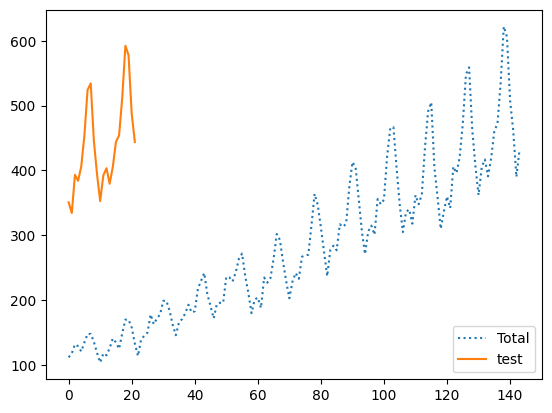

In [66]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
trainPredict = scaled.inverse_transform(trainPredict)
trainY = scaled.inverse_transform([y_train])
testPredict = scaled.inverse_transform(testPredict)
testY = scaled.inverse_transform([y_test])

import matplotlib.pyplot as plt
plt.plot(scaled.inverse_transform(dataset), linestyle=':',
label='Total')
plt.plot(testPredict, label='test')
plt.legend()

trainPredict 데이터 포함

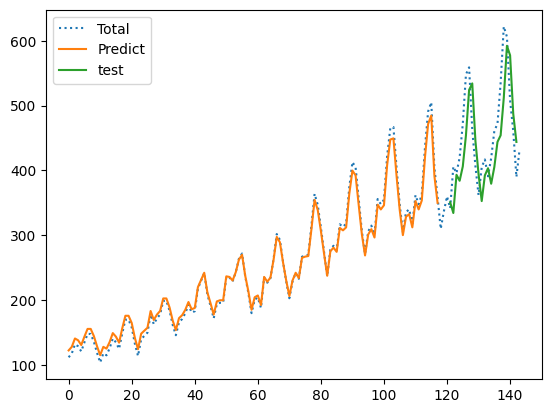

In [67]:
plt.plot(scaled.inverse_transform(dataset), linestyle=':', label='Total')
plt.plot(trainPredict, label='Predict')
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1] = testPredict
plt.plot(testPredictPlot, label='test')
plt.legend()
plt.show()

여객선 탑승객 예측 모델(LSTM 방식의 신경망)

In [68]:
import pandas as pd
dataset = pd.read_csv('/content/sample_data/airline-passengers.csv',engine='python')

dataset.pop('Month')
dataset.columns = ['Passengers']
dataset = dataset.dropna()

from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()
dataset = scaled.fit_transform(dataset)

In [69]:
train = dataset[:120]
test = dataset[120:]

In [70]:
def create_seq(data, lookback=1):
  X_data = []
  y_data = []
  for i in range(len(data)-lookback-1):
    add = data[i:(i+lookback), 0]
  X_data.append(add)
  y_data.append(data[i + lookback, 0])
  return np.array(X_data), np.array(y_data)

In [71]:
import numpy as np
lookback = 10
X_train, y_train = create_seq(train, lookback)

print(X_train)

X_test, y_test = create_seq(test, lookback)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train. shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test. shape[1]))

[[0.45559846 0.41312741 0.4980695  0.47104247 0.5        0.63899614
  0.74710425 0.77413127 0.57915058 0.49227799]]


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

#lookback = 10
model = Sequential()
#model.add(SimpleRNN(4, input_shape=(1, lookback)))
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.3046 - mae: 0.5519 - val_loss: 0.4754 - val_mae: 0.6895
Epoch 2/100
1/1 [==============================] - 0s 52ms/step - loss: 0.2835 - mae: 0.5324 - val_loss: 0.4513 - val_mae: 0.6718
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 0.2688 - mae: 0.5184 - val_loss: 0.4316 - val_mae: 0.6570
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 0.2568 - mae: 0.5068 - val_loss: 0.4145 - val_mae: 0.6438
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 0.2464 - mae: 0.4964 - val_loss: 0.3991 - val_mae: 0.6318
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 0.2371 - mae: 0.4870 - val_loss: 0.3851 - val_mae: 0.6205
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 0.2286 - mae: 0.4781 - val_loss: 0.3720 - val_mae: 0.6099
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 0.2207 - mae: 0.4698

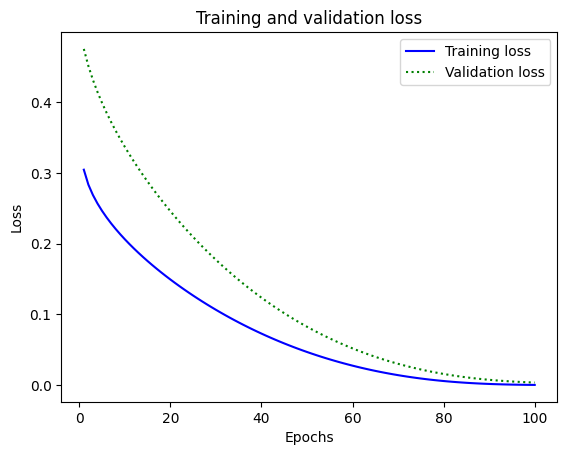

In [73]:
import matplotlib.pyplot as plt
history_dict = history.history
plt.clf()
epoch_range = range(1, epochs+1)
plt.plot(epoch_range, history_dict['loss'], 'b-', label='Training loss')
plt.plot(epoch_range, history_dict['val_loss'], 'g:', label='Validation loss')
# plt.axis([-0.3, 10, 0, 0.3])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

> 아래의 링크도 참조해서 보세요 :) <br>

https://notebook.community/zzsza/Datascience_School/30.%20%EB%94%A5%EB%9F%AC%EB%8B%9D/07.%20RNN%20%EA%B8%B0%EB%B3%B8%20%EA%B5%AC%EC%A1%B0%EC%99%80%20Keras%EB%A5%BC%20%EC%82%AC%EC%9A%A9%ED%95%9C%20RNN%20%EA%B5%AC%ED%98%84